In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clean_data.csv')
data = data.to_numpy()
data = np.delete(data, 8, 1)
data = np.delete(data, 8, 1)
data = data.astype('float64')
np.random.shuffle(data)
class_label = data[:, -1] # for last column
class_label = class_label.astype('int64') 
data = data[:, :-1] # for all but last column

In [3]:
print(data.shape)
print(class_label.shape)

(51598, 9)
(51598,)


Separate data into training data and testing data

In [4]:
x_train = data[0:49000, :]
y_train = class_label[0:49000] 
x_val = data[49000:50000, :]
y_val = class_label[49000:50000] 
x_test = data[50000:, :]
y_test = class_label[50000:] 

In [5]:
print("Training Set Data  Shape: ", x_train.shape)
print("Training Set Label Shape: ", y_train.shape)
print("Validation Set Data  Shape: ", x_val.shape)
print("Validation Set Label Shape: ", y_val.shape)
print("Test Set Data  Shape: ", x_test.shape)
print("Test Set Label Shape: ", y_test.shape)

Training Set Data  Shape:  (49000, 9)
Training Set Label Shape:  (49000,)
Validation Set Data  Shape:  (1000, 9)
Validation Set Label Shape:  (1000,)
Test Set Data  Shape:  (1598, 9)
Test Set Label Shape:  (1598,)


In [6]:
# Import more utilies and the layers you have implemented
from MLP.sequential import Sequential
from MLP.linear import Linear
from MLP.relu import ReLU
from MLP.softmax import Softmax
from MLP.loss_func import CrossEntropyLoss
from MLP.optimizer import SGD
from MLP.dataset import DataLoader
from MLP.trainer import Trainer

In [66]:
# test-case 1:
input_size = 9
hidden_size = 5 # Hidden layer size (Hyper-parameter)
num_classes = 2 # Output

def init_model():
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net_1 = init_model()
optim = SGD(net_1, lr=0.0015, weight_decay=0.000)
loss_func = CrossEntropyLoss()
epoch = 6000
batch_size = 1225

#Initialize the trainer class by passing the above modules
trainer = Trainer(dataset, optim, net_1, loss_func, epoch, batch_size, validate_interval=3)

train_error_1, validation_accuracy_1 = trainer.train()

Epoch Average Loss: 0.693139855029903
Validate Acc: 0.500 Epoch: 0
Epoch Average Loss: 0.693123671511545
Epoch Average Loss: 0.693108302902078
Epoch Average Loss: 0.693093761089115
Validate Acc: 0.500 Epoch: 3
Epoch Average Loss: 0.693079410863671
Epoch Average Loss: 0.693065430339467
Epoch Average Loss: 0.693050236876610
Validate Acc: 0.500 Epoch: 6
Epoch Average Loss: 0.693032666233754
Epoch Average Loss: 0.693009662061423
Epoch Average Loss: 0.692975010418605
Validate Acc: 0.500 Epoch: 9
Epoch Average Loss: 0.692919833220184
Epoch Average Loss: 0.692825952565322
Epoch Average Loss: 0.692669741129229
Validate Acc: 0.500 Epoch: 12
Epoch Average Loss: 0.692422047773927
Epoch Average Loss: 0.692051918136836
Epoch Average Loss: 0.691503737473372
Validate Acc: 0.500 Epoch: 15
Epoch Average Loss: 0.690671804882160
Epoch Average Loss: 0.689374074062939
Epoch Average Loss: 0.687557337694919
Validate Acc: 0.500 Epoch: 18
Epoch Average Loss: 0.685408123203108
Epoch Average Loss: 0.683248933565

Epoch Average Loss: 0.667690587234675
Validate Acc: 0.596 Epoch: 174
Epoch Average Loss: 0.667691427610370
Epoch Average Loss: 0.667673644064269
Epoch Average Loss: 0.667738573216165
Validate Acc: 0.598 Epoch: 177
Epoch Average Loss: 0.667630055465423
Epoch Average Loss: 0.667657818969854
Epoch Average Loss: 0.667729509966913
Validate Acc: 0.598 Epoch: 180
Epoch Average Loss: 0.667611957570492
Epoch Average Loss: 0.667668610733719
Epoch Average Loss: 0.667724677788907
Validate Acc: 0.590 Epoch: 183
Epoch Average Loss: 0.667633812366154
Epoch Average Loss: 0.667660063109151
Epoch Average Loss: 0.667561746673480
Validate Acc: 0.598 Epoch: 186
Epoch Average Loss: 0.667627009158312
Epoch Average Loss: 0.667527230774728
Epoch Average Loss: 0.667540175924964
Validate Acc: 0.574 Epoch: 189
Epoch Average Loss: 0.667595113092452
Epoch Average Loss: 0.667556986544164
Epoch Average Loss: 0.667562109055019
Validate Acc: 0.597 Epoch: 192
Epoch Average Loss: 0.667565877905049
Epoch Average Loss: 0.6

Epoch Average Loss: 0.666961241758001
Epoch Average Loss: 0.666870801867937
Validate Acc: 0.601 Epoch: 345
Epoch Average Loss: 0.666994470729288
Epoch Average Loss: 0.666960706369232
Epoch Average Loss: 0.666935582798529
Validate Acc: 0.592 Epoch: 348
Epoch Average Loss: 0.667033918725108
Epoch Average Loss: 0.666870791586856
Epoch Average Loss: 0.666946730619598
Validate Acc: 0.596 Epoch: 351
Epoch Average Loss: 0.666958672353227
Epoch Average Loss: 0.666976877589558
Epoch Average Loss: 0.666884333840703
Validate Acc: 0.598 Epoch: 354
Epoch Average Loss: 0.666860205894653
Epoch Average Loss: 0.666946459704264
Epoch Average Loss: 0.666876810138212
Validate Acc: 0.600 Epoch: 357
Epoch Average Loss: 0.666897628013520
Epoch Average Loss: 0.666871016658769
Epoch Average Loss: 0.666856990074957
Validate Acc: 0.598 Epoch: 360
Epoch Average Loss: 0.666874614901744
Epoch Average Loss: 0.666875984099211
Epoch Average Loss: 0.666928042108788
Validate Acc: 0.600 Epoch: 363
Epoch Average Loss: 0.6

Validate Acc: 0.596 Epoch: 513
Epoch Average Loss: 0.666581348691589
Epoch Average Loss: 0.666495295387299
Epoch Average Loss: 0.666420829807487
Validate Acc: 0.596 Epoch: 516
Epoch Average Loss: 0.666529499783070
Epoch Average Loss: 0.666491897753855
Epoch Average Loss: 0.666460809260716
Validate Acc: 0.595 Epoch: 519
Epoch Average Loss: 0.666503518995478
Epoch Average Loss: 0.666562326221049
Epoch Average Loss: 0.666499061542846
Validate Acc: 0.596 Epoch: 522
Epoch Average Loss: 0.666459351819636
Epoch Average Loss: 0.666507566558215
Epoch Average Loss: 0.666555909398618
Validate Acc: 0.597 Epoch: 525
Epoch Average Loss: 0.666504872662577
Epoch Average Loss: 0.666538181164694
Epoch Average Loss: 0.666520070887381
Validate Acc: 0.595 Epoch: 528
Epoch Average Loss: 0.666440196597014
Epoch Average Loss: 0.666551210124918
Epoch Average Loss: 0.666520703594304
Validate Acc: 0.595 Epoch: 531
Epoch Average Loss: 0.666419379353344
Epoch Average Loss: 0.666422978877013
Epoch Average Loss: 0.6

Validate Acc: 0.600 Epoch: 693
Epoch Average Loss: 0.666173648421416
Epoch Average Loss: 0.666147497604928
Epoch Average Loss: 0.666276427507044
Validate Acc: 0.597 Epoch: 696
Epoch Average Loss: 0.666164220301588
Epoch Average Loss: 0.666187106749534
Epoch Average Loss: 0.666310275157493
Validate Acc: 0.588 Epoch: 699
Epoch Average Loss: 0.666187584911577
Epoch Average Loss: 0.666206797575437
Epoch Average Loss: 0.666258055905170
Validate Acc: 0.597 Epoch: 702
Epoch Average Loss: 0.666263507484085
Epoch Average Loss: 0.666145719226073
Epoch Average Loss: 0.666186031406597
Validate Acc: 0.597 Epoch: 705
Epoch Average Loss: 0.666221240685003
Epoch Average Loss: 0.666163514246500
Epoch Average Loss: 0.666153924821355
Validate Acc: 0.595 Epoch: 708
Epoch Average Loss: 0.666239537661448
Epoch Average Loss: 0.666190124163915
Epoch Average Loss: 0.666217247505715
Validate Acc: 0.596 Epoch: 711
Epoch Average Loss: 0.666114209389526
Epoch Average Loss: 0.666109168920055
Epoch Average Loss: 0.6

Validate Acc: 0.599 Epoch: 873
Epoch Average Loss: 0.665966130894254
Epoch Average Loss: 0.666146713086869
Epoch Average Loss: 0.666160163037294
Validate Acc: 0.597 Epoch: 876
Epoch Average Loss: 0.666028518622404
Epoch Average Loss: 0.666019801656556
Epoch Average Loss: 0.665999770009518
Validate Acc: 0.598 Epoch: 879
Epoch Average Loss: 0.665982220513471
Epoch Average Loss: 0.665946050537194
Epoch Average Loss: 0.666018325181918
Validate Acc: 0.589 Epoch: 882
Epoch Average Loss: 0.666005097899682
Epoch Average Loss: 0.666029765129458
Epoch Average Loss: 0.665965393637340
Validate Acc: 0.596 Epoch: 885
Epoch Average Loss: 0.666088993128017
Epoch Average Loss: 0.666017539046508
Epoch Average Loss: 0.666012005957934
Validate Acc: 0.588 Epoch: 888
Epoch Average Loss: 0.665971017174458
Epoch Average Loss: 0.665995458484183
Epoch Average Loss: 0.666080181068908
Validate Acc: 0.587 Epoch: 891
Epoch Average Loss: 0.666175806677141
Epoch Average Loss: 0.666039089276566
Epoch Average Loss: 0.6

Epoch Average Loss: 0.665906595705916
Validate Acc: 0.597 Epoch: 1056
Epoch Average Loss: 0.665876922228367
Epoch Average Loss: 0.665885358627883
Epoch Average Loss: 0.665858472585986
Validate Acc: 0.587 Epoch: 1059
Epoch Average Loss: 0.665832041403304
Epoch Average Loss: 0.665902634272584
Epoch Average Loss: 0.665860965902616
Validate Acc: 0.591 Epoch: 1062
Epoch Average Loss: 0.665873097268194
Epoch Average Loss: 0.665812955039431
Epoch Average Loss: 0.665849116502037
Validate Acc: 0.590 Epoch: 1065
Epoch Average Loss: 0.665842847043866
Epoch Average Loss: 0.665883302701983
Epoch Average Loss: 0.665874528668407
Validate Acc: 0.599 Epoch: 1068
Epoch Average Loss: 0.665883474224420
Epoch Average Loss: 0.666057369160417
Epoch Average Loss: 0.665916130512547
Validate Acc: 0.587 Epoch: 1071
Epoch Average Loss: 0.665862545119833
Epoch Average Loss: 0.665909880272609
Epoch Average Loss: 0.665885791799885
Validate Acc: 0.599 Epoch: 1074
Epoch Average Loss: 0.665901415576097
Epoch Average Lo

Epoch Average Loss: 0.665811559178120
Epoch Average Loss: 0.665772926625721
Validate Acc: 0.597 Epoch: 1239
Epoch Average Loss: 0.665695554282520
Epoch Average Loss: 0.665808893024232
Epoch Average Loss: 0.665730493509269
Validate Acc: 0.596 Epoch: 1242
Epoch Average Loss: 0.665822795085038
Epoch Average Loss: 0.665794544709849
Epoch Average Loss: 0.665718780316791
Validate Acc: 0.601 Epoch: 1245
Epoch Average Loss: 0.665803934452815
Epoch Average Loss: 0.665703091234915
Epoch Average Loss: 0.665731019281300
Validate Acc: 0.597 Epoch: 1248
Epoch Average Loss: 0.665712657476077
Epoch Average Loss: 0.665892672994315
Epoch Average Loss: 0.665790401648347
Validate Acc: 0.599 Epoch: 1251
Epoch Average Loss: 0.665718617047359
Epoch Average Loss: 0.665929497957452
Epoch Average Loss: 0.665718698393531
Validate Acc: 0.596 Epoch: 1254
Epoch Average Loss: 0.665832116873805
Epoch Average Loss: 0.665839209771616
Epoch Average Loss: 0.665846067943821
Validate Acc: 0.592 Epoch: 1257
Epoch Average Lo

Epoch Average Loss: 0.665723467484005
Validate Acc: 0.596 Epoch: 1419
Epoch Average Loss: 0.665633902988622
Epoch Average Loss: 0.665708643074862
Epoch Average Loss: 0.665682400730467
Validate Acc: 0.600 Epoch: 1422
Epoch Average Loss: 0.665682383380971
Epoch Average Loss: 0.665662816133373
Epoch Average Loss: 0.665770077148496
Validate Acc: 0.605 Epoch: 1425
Epoch Average Loss: 0.665673644116569
Epoch Average Loss: 0.665780442549735
Epoch Average Loss: 0.665754085372071
Validate Acc: 0.599 Epoch: 1428
Epoch Average Loss: 0.665706864016820
Epoch Average Loss: 0.665726508866449
Epoch Average Loss: 0.665676878642194
Validate Acc: 0.598 Epoch: 1431
Epoch Average Loss: 0.665752016306803
Epoch Average Loss: 0.665616641036475
Epoch Average Loss: 0.665750776747787
Validate Acc: 0.600 Epoch: 1434
Epoch Average Loss: 0.665710210152890
Epoch Average Loss: 0.665728979742025
Epoch Average Loss: 0.665651860883134
Validate Acc: 0.599 Epoch: 1437
Epoch Average Loss: 0.665723731119377
Epoch Average Lo

Validate Acc: 0.596 Epoch: 1590
Epoch Average Loss: 0.665576935479706
Epoch Average Loss: 0.665589097254841
Epoch Average Loss: 0.665728646232334
Validate Acc: 0.595 Epoch: 1593
Epoch Average Loss: 0.665615390858005
Epoch Average Loss: 0.665714865120509
Epoch Average Loss: 0.665627369349410
Validate Acc: 0.597 Epoch: 1596
Epoch Average Loss: 0.665718153624579
Epoch Average Loss: 0.665587245910968
Epoch Average Loss: 0.665649701238341
Validate Acc: 0.594 Epoch: 1599
Epoch Average Loss: 0.665719979514492
Epoch Average Loss: 0.665651602994240
Epoch Average Loss: 0.665693590483589
Validate Acc: 0.596 Epoch: 1602
Epoch Average Loss: 0.665708687409052
Epoch Average Loss: 0.665842608509389
Epoch Average Loss: 0.665578196912569
Validate Acc: 0.595 Epoch: 1605
Epoch Average Loss: 0.665653933642597
Epoch Average Loss: 0.665638704319774
Epoch Average Loss: 0.665721304866085
Validate Acc: 0.596 Epoch: 1608
Epoch Average Loss: 0.665609845984165
Epoch Average Loss: 0.665703617500823
Epoch Average Lo

Epoch Average Loss: 0.665637713987924
Epoch Average Loss: 0.665633096667253
Epoch Average Loss: 0.665727683514498
Validate Acc: 0.593 Epoch: 1764
Epoch Average Loss: 0.665581203882053
Epoch Average Loss: 0.665634928013302
Epoch Average Loss: 0.665699854678848
Validate Acc: 0.596 Epoch: 1767
Epoch Average Loss: 0.665573079021671
Epoch Average Loss: 0.665582369268995
Epoch Average Loss: 0.665665962354199
Validate Acc: 0.595 Epoch: 1770
Epoch Average Loss: 0.665686099811126
Epoch Average Loss: 0.665650440322494
Epoch Average Loss: 0.665626532266357
Validate Acc: 0.591 Epoch: 1773
Epoch Average Loss: 0.665610526747308
Epoch Average Loss: 0.665603329237570
Epoch Average Loss: 0.665646991527298
Validate Acc: 0.596 Epoch: 1776
Epoch Average Loss: 0.665606365092992
Epoch Average Loss: 0.665631663199749
Epoch Average Loss: 0.665651109733385
Validate Acc: 0.601 Epoch: 1779
Epoch Average Loss: 0.665642521505825
Epoch Average Loss: 0.665638923459629
Epoch Average Loss: 0.665728536368876
Validate A

Validate Acc: 0.591 Epoch: 1932
Epoch Average Loss: 0.665603702054861
Epoch Average Loss: 0.665570810024641
Epoch Average Loss: 0.665613617405210
Validate Acc: 0.588 Epoch: 1935
Epoch Average Loss: 0.665555254150345
Epoch Average Loss: 0.665615063478298
Epoch Average Loss: 0.665686860858610
Validate Acc: 0.597 Epoch: 1938
Epoch Average Loss: 0.665610914456204
Epoch Average Loss: 0.665617117970220
Epoch Average Loss: 0.665546641085853
Validate Acc: 0.571 Epoch: 1941
Epoch Average Loss: 0.665472974738151
Epoch Average Loss: 0.665667173606210
Epoch Average Loss: 0.665611354591442
Validate Acc: 0.597 Epoch: 1944
Epoch Average Loss: 0.665640112450954
Epoch Average Loss: 0.665614386699508
Epoch Average Loss: 0.665573057277056
Validate Acc: 0.599 Epoch: 1947
Epoch Average Loss: 0.665551157750283
Epoch Average Loss: 0.665541699173657
Epoch Average Loss: 0.665595658324703
Validate Acc: 0.597 Epoch: 1950
Epoch Average Loss: 0.665738029130862
Epoch Average Loss: 0.665557727452810
Epoch Average Lo

Validate Acc: 0.598 Epoch: 2112
Epoch Average Loss: 0.665541141419831
Epoch Average Loss: 0.665546108637667
Epoch Average Loss: 0.665531728447448
Validate Acc: 0.598 Epoch: 2115
Epoch Average Loss: 0.665509744766480
Epoch Average Loss: 0.665593198373439
Epoch Average Loss: 0.665511937957467
Validate Acc: 0.596 Epoch: 2118
Epoch Average Loss: 0.665669817742135
Epoch Average Loss: 0.665560991420547
Epoch Average Loss: 0.665595541647343
Validate Acc: 0.597 Epoch: 2121
Epoch Average Loss: 0.665453059965918
Epoch Average Loss: 0.665536934062374
Epoch Average Loss: 0.665453993667012
Validate Acc: 0.595 Epoch: 2124
Epoch Average Loss: 0.665519872304996
Epoch Average Loss: 0.665531614877838
Epoch Average Loss: 0.665537059429981
Validate Acc: 0.595 Epoch: 2127
Epoch Average Loss: 0.665543436483260
Epoch Average Loss: 0.665555398429034
Epoch Average Loss: 0.665589327401300
Validate Acc: 0.598 Epoch: 2130
Epoch Average Loss: 0.665622890691422
Epoch Average Loss: 0.665516605398198
Epoch Average Lo

Validate Acc: 0.596 Epoch: 2289
Epoch Average Loss: 0.665509691663901
Epoch Average Loss: 0.665464867827660
Epoch Average Loss: 0.665553357056082
Validate Acc: 0.597 Epoch: 2292
Epoch Average Loss: 0.665451798444768
Epoch Average Loss: 0.665471137001977
Epoch Average Loss: 0.665474272812633
Validate Acc: 0.598 Epoch: 2295
Epoch Average Loss: 0.665491052428485
Epoch Average Loss: 0.665506107096829
Epoch Average Loss: 0.665530037706162
Validate Acc: 0.596 Epoch: 2298
Epoch Average Loss: 0.665593299520350
Epoch Average Loss: 0.665670457402084
Epoch Average Loss: 0.665443527036225
Validate Acc: 0.597 Epoch: 2301
Epoch Average Loss: 0.665482499480877
Epoch Average Loss: 0.665499280015881
Epoch Average Loss: 0.665419433912453
Validate Acc: 0.594 Epoch: 2304
Epoch Average Loss: 0.665612025922578
Epoch Average Loss: 0.665623043062022
Epoch Average Loss: 0.665563810361786
Validate Acc: 0.581 Epoch: 2307
Epoch Average Loss: 0.665610576879682
Epoch Average Loss: 0.665681621615123
Epoch Average Lo

Epoch Average Loss: 0.665502615612754
Validate Acc: 0.589 Epoch: 2466
Epoch Average Loss: 0.665505125362939
Epoch Average Loss: 0.665483183187072
Epoch Average Loss: 0.665415941805568
Validate Acc: 0.593 Epoch: 2469
Epoch Average Loss: 0.665470118078501
Epoch Average Loss: 0.665478745174621
Epoch Average Loss: 0.665574738674576
Validate Acc: 0.597 Epoch: 2472
Epoch Average Loss: 0.665432192706844
Epoch Average Loss: 0.665551375980839
Epoch Average Loss: 0.665411324843216
Validate Acc: 0.597 Epoch: 2475
Epoch Average Loss: 0.665424251407241
Epoch Average Loss: 0.665442354040753
Epoch Average Loss: 0.665620289970664
Validate Acc: 0.598 Epoch: 2478
Epoch Average Loss: 0.665414973715371
Epoch Average Loss: 0.665443175379086
Epoch Average Loss: 0.665515414726294
Validate Acc: 0.595 Epoch: 2481
Epoch Average Loss: 0.665432395143961
Epoch Average Loss: 0.665408811416986
Epoch Average Loss: 0.665438461391089
Validate Acc: 0.593 Epoch: 2484
Epoch Average Loss: 0.665409301148875
Epoch Average Lo

Epoch Average Loss: 0.665530683828771
Epoch Average Loss: 0.665488398675979
Epoch Average Loss: 0.665534001665679
Validate Acc: 0.583 Epoch: 2643
Epoch Average Loss: 0.665430861615070
Epoch Average Loss: 0.665534003263089
Epoch Average Loss: 0.665442278685054
Validate Acc: 0.593 Epoch: 2646
Epoch Average Loss: 0.665429204177477
Epoch Average Loss: 0.665475633223586
Epoch Average Loss: 0.665473201359595
Validate Acc: 0.596 Epoch: 2649
Epoch Average Loss: 0.665470218116233
Epoch Average Loss: 0.665413614706141
Epoch Average Loss: 0.665421436574710
Validate Acc: 0.597 Epoch: 2652
Epoch Average Loss: 0.665409353895325
Epoch Average Loss: 0.665383441186944
Epoch Average Loss: 0.665414406450195
Validate Acc: 0.589 Epoch: 2655
Epoch Average Loss: 0.665525948590021
Epoch Average Loss: 0.665557112614014
Epoch Average Loss: 0.665494660056013
Validate Acc: 0.593 Epoch: 2658
Epoch Average Loss: 0.665574702925111
Epoch Average Loss: 0.665489513716713
Epoch Average Loss: 0.665416334673765
Validate A

Epoch Average Loss: 0.665441438350533
Validate Acc: 0.598 Epoch: 2814
Epoch Average Loss: 0.665521407273965
Epoch Average Loss: 0.665383554868206
Epoch Average Loss: 0.665429443610940
Validate Acc: 0.591 Epoch: 2817
Epoch Average Loss: 0.665434539573765
Epoch Average Loss: 0.665436164524613
Epoch Average Loss: 0.665471204796771
Validate Acc: 0.598 Epoch: 2820
Epoch Average Loss: 0.665382661052938
Epoch Average Loss: 0.665511015451086
Epoch Average Loss: 0.665336383863141
Validate Acc: 0.602 Epoch: 2823
Epoch Average Loss: 0.665548513025640
Epoch Average Loss: 0.665356771699533
Epoch Average Loss: 0.665499731560895
Validate Acc: 0.587 Epoch: 2826
Epoch Average Loss: 0.665426840057180
Epoch Average Loss: 0.665357006164716
Epoch Average Loss: 0.665461941789275
Validate Acc: 0.596 Epoch: 2829
Epoch Average Loss: 0.665411902987898
Epoch Average Loss: 0.665379891051351
Epoch Average Loss: 0.665403618417754
Validate Acc: 0.586 Epoch: 2832
Epoch Average Loss: 0.665438021384799
Epoch Average Lo

Validate Acc: 0.580 Epoch: 2982
Epoch Average Loss: 0.665430148711817
Epoch Average Loss: 0.665542849350417
Epoch Average Loss: 0.665419519891360
Validate Acc: 0.597 Epoch: 2985
Epoch Average Loss: 0.665315253473706
Epoch Average Loss: 0.665371214754289
Epoch Average Loss: 0.665418272294149
Validate Acc: 0.590 Epoch: 2988
Epoch Average Loss: 0.665484600133731
Epoch Average Loss: 0.665393869089735
Epoch Average Loss: 0.665417716087134
Validate Acc: 0.597 Epoch: 2991
Epoch Average Loss: 0.665390604760845
Epoch Average Loss: 0.665423457783256
Epoch Average Loss: 0.665504277694409
Validate Acc: 0.594 Epoch: 2994
Epoch Average Loss: 0.665415044294067
Epoch Average Loss: 0.665356450714982
Epoch Average Loss: 0.665378478453397
Validate Acc: 0.600 Epoch: 2997
Epoch Average Loss: 0.665394150342837
Epoch Average Loss: 0.665420511441582
Epoch Average Loss: 0.665399834119745
Validate Acc: 0.594 Epoch: 3000
Epoch Average Loss: 0.665441742638561
Epoch Average Loss: 0.665421601997447
Epoch Average Lo

Epoch Average Loss: 0.665371681204331
Epoch Average Loss: 0.665475411088975
Validate Acc: 0.596 Epoch: 3162
Epoch Average Loss: 0.665354624702768
Epoch Average Loss: 0.665460816837811
Epoch Average Loss: 0.665332723239737
Validate Acc: 0.597 Epoch: 3165
Epoch Average Loss: 0.665343945095062
Epoch Average Loss: 0.665487279815020
Epoch Average Loss: 0.665344174869723
Validate Acc: 0.597 Epoch: 3168
Epoch Average Loss: 0.665360781534195
Epoch Average Loss: 0.665362794141658
Epoch Average Loss: 0.665434777651693
Validate Acc: 0.593 Epoch: 3171
Epoch Average Loss: 0.665361053143897
Epoch Average Loss: 0.665342745476952
Epoch Average Loss: 0.665346107629780
Validate Acc: 0.597 Epoch: 3174
Epoch Average Loss: 0.665399048405727
Epoch Average Loss: 0.665342678637185
Epoch Average Loss: 0.665444712876971
Validate Acc: 0.594 Epoch: 3177
Epoch Average Loss: 0.665399044955628
Epoch Average Loss: 0.665553353487139
Epoch Average Loss: 0.665359872270655
Validate Acc: 0.586 Epoch: 3180
Epoch Average Lo

Epoch Average Loss: 0.665427233190319
Validate Acc: 0.597 Epoch: 3330
Epoch Average Loss: 0.665248401681217
Epoch Average Loss: 0.665387467172772
Epoch Average Loss: 0.665343087395687
Validate Acc: 0.596 Epoch: 3333
Epoch Average Loss: 0.665371010899934
Epoch Average Loss: 0.665365126257690
Epoch Average Loss: 0.665319416963441
Validate Acc: 0.593 Epoch: 3336
Epoch Average Loss: 0.665367755773828
Epoch Average Loss: 0.665385290829230
Epoch Average Loss: 0.665380057317101
Validate Acc: 0.599 Epoch: 3339
Epoch Average Loss: 0.665465762718810
Epoch Average Loss: 0.665327251182801
Epoch Average Loss: 0.665323062053528
Validate Acc: 0.599 Epoch: 3342
Epoch Average Loss: 0.665473440072288
Epoch Average Loss: 0.665325315914423
Epoch Average Loss: 0.665451214373416
Validate Acc: 0.597 Epoch: 3345
Epoch Average Loss: 0.665407394212455
Epoch Average Loss: 0.665307490842658
Epoch Average Loss: 0.665323269054878
Validate Acc: 0.599 Epoch: 3348
Epoch Average Loss: 0.665301459495497
Epoch Average Lo

Validate Acc: 0.594 Epoch: 3501
Epoch Average Loss: 0.665256836109321
Epoch Average Loss: 0.665311412075483
Epoch Average Loss: 0.665283479256787
Validate Acc: 0.574 Epoch: 3504
Epoch Average Loss: 0.665320562354912
Epoch Average Loss: 0.665429623751486
Epoch Average Loss: 0.665293997177180
Validate Acc: 0.596 Epoch: 3507
Epoch Average Loss: 0.665328972942839
Epoch Average Loss: 0.665426584042667
Epoch Average Loss: 0.665286977771347
Validate Acc: 0.592 Epoch: 3510
Epoch Average Loss: 0.665382070901147
Epoch Average Loss: 0.665380765075082
Epoch Average Loss: 0.665385289344843
Validate Acc: 0.597 Epoch: 3513
Epoch Average Loss: 0.665253726425245
Epoch Average Loss: 0.665421862435132
Epoch Average Loss: 0.665326996118323
Validate Acc: 0.596 Epoch: 3516
Epoch Average Loss: 0.665305011707797
Epoch Average Loss: 0.665377025613658
Epoch Average Loss: 0.665361191888681
Validate Acc: 0.585 Epoch: 3519
Epoch Average Loss: 0.665265335234734
Epoch Average Loss: 0.665360330921229
Epoch Average Lo

Epoch Average Loss: 0.665401647756526
Epoch Average Loss: 0.665355973387880
Validate Acc: 0.599 Epoch: 3684
Epoch Average Loss: 0.665274650448860
Epoch Average Loss: 0.665380736849273
Epoch Average Loss: 0.665335888632245
Validate Acc: 0.597 Epoch: 3687
Epoch Average Loss: 0.665255693575693
Epoch Average Loss: 0.665379305575111
Epoch Average Loss: 0.665347530822397
Validate Acc: 0.580 Epoch: 3690
Epoch Average Loss: 0.665325976224848
Epoch Average Loss: 0.665462146799795
Epoch Average Loss: 0.665316489294848
Validate Acc: 0.603 Epoch: 3693
Epoch Average Loss: 0.665180534872943
Epoch Average Loss: 0.665313959349453
Epoch Average Loss: 0.665348933909454
Validate Acc: 0.594 Epoch: 3696
Epoch Average Loss: 0.665356624337327
Epoch Average Loss: 0.665230284513634
Epoch Average Loss: 0.665339697671672
Validate Acc: 0.592 Epoch: 3699
Epoch Average Loss: 0.665308437183780
Epoch Average Loss: 0.665287463057793
Epoch Average Loss: 0.665352000887333
Validate Acc: 0.594 Epoch: 3702
Epoch Average Lo

Epoch Average Loss: 0.665228370286244
Epoch Average Loss: 0.665214079142704
Epoch Average Loss: 0.665340696310346
Validate Acc: 0.586 Epoch: 3864
Epoch Average Loss: 0.665311627764750
Epoch Average Loss: 0.665308768298628
Epoch Average Loss: 0.665356551912517
Validate Acc: 0.586 Epoch: 3867
Epoch Average Loss: 0.665297489068081
Epoch Average Loss: 0.665177488681109
Epoch Average Loss: 0.665330349189997
Validate Acc: 0.597 Epoch: 3870
Epoch Average Loss: 0.665259428415894
Epoch Average Loss: 0.665276728961025
Epoch Average Loss: 0.665257702390329
Validate Acc: 0.599 Epoch: 3873
Epoch Average Loss: 0.665356264380222
Epoch Average Loss: 0.665339445543069
Epoch Average Loss: 0.665304835730510
Validate Acc: 0.597 Epoch: 3876
Epoch Average Loss: 0.665372290796338
Epoch Average Loss: 0.665291273449287
Epoch Average Loss: 0.665238587405863
Validate Acc: 0.598 Epoch: 3879
Epoch Average Loss: 0.665232456638532
Epoch Average Loss: 0.665364138910287
Epoch Average Loss: 0.665357635545737
Validate A

Epoch Average Loss: 0.665206587169285
Validate Acc: 0.598 Epoch: 4035
Epoch Average Loss: 0.665321534841478
Epoch Average Loss: 0.665223788449500
Epoch Average Loss: 0.665380778298019
Validate Acc: 0.598 Epoch: 4038
Epoch Average Loss: 0.665314482432790
Epoch Average Loss: 0.665316975109720
Epoch Average Loss: 0.665205101211518
Validate Acc: 0.594 Epoch: 4041
Epoch Average Loss: 0.665206283964314
Epoch Average Loss: 0.665285909247141
Epoch Average Loss: 0.665244594627871
Validate Acc: 0.590 Epoch: 4044
Epoch Average Loss: 0.665237873902327
Epoch Average Loss: 0.665342225858027
Epoch Average Loss: 0.665217791603989
Validate Acc: 0.607 Epoch: 4047
Epoch Average Loss: 0.665374321906246
Epoch Average Loss: 0.665281326943504
Epoch Average Loss: 0.665269075240998
Validate Acc: 0.598 Epoch: 4050
Epoch Average Loss: 0.665174851426001
Epoch Average Loss: 0.665265969368993
Epoch Average Loss: 0.665303901175028
Validate Acc: 0.596 Epoch: 4053
Epoch Average Loss: 0.665287526299121
Epoch Average Lo

Epoch Average Loss: 0.665317561711859
Validate Acc: 0.599 Epoch: 4206
Epoch Average Loss: 0.665335349157463
Epoch Average Loss: 0.665187296566649
Epoch Average Loss: 0.665184956947520
Validate Acc: 0.596 Epoch: 4209
Epoch Average Loss: 0.665220819001414
Epoch Average Loss: 0.665199180276960
Epoch Average Loss: 0.665258293307326
Validate Acc: 0.597 Epoch: 4212
Epoch Average Loss: 0.665222458725873
Epoch Average Loss: 0.665355981403329
Epoch Average Loss: 0.665234395658321
Validate Acc: 0.597 Epoch: 4215
Epoch Average Loss: 0.665184879656880
Epoch Average Loss: 0.665203266646708
Epoch Average Loss: 0.665239003825810
Validate Acc: 0.586 Epoch: 4218
Epoch Average Loss: 0.665255994734697
Epoch Average Loss: 0.665161864355356
Epoch Average Loss: 0.665382857256321
Validate Acc: 0.582 Epoch: 4221
Epoch Average Loss: 0.665386700079559
Epoch Average Loss: 0.665253512743887
Epoch Average Loss: 0.665228057887232
Validate Acc: 0.596 Epoch: 4224
Epoch Average Loss: 0.665194374292148
Epoch Average Lo

Validate Acc: 0.589 Epoch: 4374
Epoch Average Loss: 0.665232189585150
Epoch Average Loss: 0.665156010375823
Epoch Average Loss: 0.665188164944570
Validate Acc: 0.598 Epoch: 4377
Epoch Average Loss: 0.665203627366046
Epoch Average Loss: 0.665191844396825
Epoch Average Loss: 0.665261463227839
Validate Acc: 0.598 Epoch: 4380
Epoch Average Loss: 0.665263469069319
Epoch Average Loss: 0.665222240752517
Epoch Average Loss: 0.665261173521187
Validate Acc: 0.587 Epoch: 4383
Epoch Average Loss: 0.665305726964186
Epoch Average Loss: 0.665188504965895
Epoch Average Loss: 0.665242306057179
Validate Acc: 0.585 Epoch: 4386
Epoch Average Loss: 0.665242541288667
Epoch Average Loss: 0.665301278523945
Epoch Average Loss: 0.665179129333585
Validate Acc: 0.598 Epoch: 4389
Epoch Average Loss: 0.665275615241356
Epoch Average Loss: 0.665236620009612
Epoch Average Loss: 0.665293770597766
Validate Acc: 0.597 Epoch: 4392
Epoch Average Loss: 0.665309244724053
Epoch Average Loss: 0.665282280931171
Epoch Average Lo

Epoch Average Loss: 0.665210659603667
Validate Acc: 0.595 Epoch: 4548
Epoch Average Loss: 0.665246962367464
Epoch Average Loss: 0.665232380102416
Epoch Average Loss: 0.665407818404006
Validate Acc: 0.592 Epoch: 4551
Epoch Average Loss: 0.665176198578109
Epoch Average Loss: 0.665229461201815
Epoch Average Loss: 0.665202287525194
Validate Acc: 0.601 Epoch: 4554
Epoch Average Loss: 0.665259376117348
Epoch Average Loss: 0.665207953138226
Epoch Average Loss: 0.665226559475578
Validate Acc: 0.599 Epoch: 4557
Epoch Average Loss: 0.665209116597616
Epoch Average Loss: 0.665214639871692
Epoch Average Loss: 0.665227945171166
Validate Acc: 0.599 Epoch: 4560
Epoch Average Loss: 0.665264238027321
Epoch Average Loss: 0.665255837038419
Epoch Average Loss: 0.665285772172653
Validate Acc: 0.597 Epoch: 4563
Epoch Average Loss: 0.665281942203902
Epoch Average Loss: 0.665160726487472
Epoch Average Loss: 0.665206265932311
Validate Acc: 0.596 Epoch: 4566
Epoch Average Loss: 0.665089868142267
Epoch Average Lo

Epoch Average Loss: 0.665199558178213
Epoch Average Loss: 0.665177709560316
Epoch Average Loss: 0.665339280764753
Validate Acc: 0.592 Epoch: 4731
Epoch Average Loss: 0.665058743869786
Epoch Average Loss: 0.665233065020076
Epoch Average Loss: 0.665206601023748
Validate Acc: 0.592 Epoch: 4734
Epoch Average Loss: 0.665212677227098
Epoch Average Loss: 0.665230950856462
Epoch Average Loss: 0.665235840399533
Validate Acc: 0.596 Epoch: 4737
Epoch Average Loss: 0.665162281296336
Epoch Average Loss: 0.665119900874562
Epoch Average Loss: 0.665150595858595
Validate Acc: 0.594 Epoch: 4740
Epoch Average Loss: 0.665217227445508
Epoch Average Loss: 0.665249441087832
Epoch Average Loss: 0.665156353293148
Validate Acc: 0.601 Epoch: 4743
Epoch Average Loss: 0.665195474996039
Epoch Average Loss: 0.665222970377022
Epoch Average Loss: 0.665261466201940
Validate Acc: 0.600 Epoch: 4746
Epoch Average Loss: 0.665144399997160
Epoch Average Loss: 0.665218398663799
Epoch Average Loss: 0.665171632150053
Validate A

Epoch Average Loss: 0.665129185327771
Epoch Average Loss: 0.665166992621636
Epoch Average Loss: 0.665226015817587
Validate Acc: 0.583 Epoch: 4902
Epoch Average Loss: 0.665195728225676
Epoch Average Loss: 0.665139832486090
Epoch Average Loss: 0.665148897897449
Validate Acc: 0.584 Epoch: 4905
Epoch Average Loss: 0.665192276202205
Epoch Average Loss: 0.665162349862806
Epoch Average Loss: 0.665305231635533
Validate Acc: 0.582 Epoch: 4908
Epoch Average Loss: 0.665317027862802
Epoch Average Loss: 0.665133424226638
Epoch Average Loss: 0.665141274269990
Validate Acc: 0.584 Epoch: 4911
Epoch Average Loss: 0.665313910099460
Epoch Average Loss: 0.665239793991906
Epoch Average Loss: 0.665082169430810
Validate Acc: 0.595 Epoch: 4914
Epoch Average Loss: 0.665176356889627
Epoch Average Loss: 0.665169018288458
Epoch Average Loss: 0.665214331253729
Validate Acc: 0.598 Epoch: 4917
Epoch Average Loss: 0.665199425263188
Epoch Average Loss: 0.665216012665661
Epoch Average Loss: 0.665114715493054
Validate A

Epoch Average Loss: 0.665150729388863
Epoch Average Loss: 0.665205965975587
Validate Acc: 0.594 Epoch: 5076
Epoch Average Loss: 0.665162543901499
Epoch Average Loss: 0.665293759145191
Epoch Average Loss: 0.665155652442213
Validate Acc: 0.595 Epoch: 5079
Epoch Average Loss: 0.665145482995087
Epoch Average Loss: 0.665154626078792
Epoch Average Loss: 0.665264463562161
Validate Acc: 0.599 Epoch: 5082
Epoch Average Loss: 0.665148718926972
Epoch Average Loss: 0.665054139927175
Epoch Average Loss: 0.665236370630735
Validate Acc: 0.597 Epoch: 5085
Epoch Average Loss: 0.665148315757478
Epoch Average Loss: 0.665269074555177
Epoch Average Loss: 0.665234048342257
Validate Acc: 0.601 Epoch: 5088
Epoch Average Loss: 0.665179109596189
Epoch Average Loss: 0.665033309890082
Epoch Average Loss: 0.665218486798015
Validate Acc: 0.599 Epoch: 5091
Epoch Average Loss: 0.665131488855482
Epoch Average Loss: 0.665124921949590
Epoch Average Loss: 0.665097744993178
Validate Acc: 0.604 Epoch: 5094
Epoch Average Lo

Epoch Average Loss: 0.665119355748795
Epoch Average Loss: 0.665289607516264
Validate Acc: 0.587 Epoch: 5247
Epoch Average Loss: 0.665104705652661
Epoch Average Loss: 0.665176653709890
Epoch Average Loss: 0.665153021107505
Validate Acc: 0.596 Epoch: 5250
Epoch Average Loss: 0.665097658304804
Epoch Average Loss: 0.665124061114036
Epoch Average Loss: 0.665121209420625
Validate Acc: 0.587 Epoch: 5253
Epoch Average Loss: 0.665118755653979
Epoch Average Loss: 0.665069615418944
Epoch Average Loss: 0.665110800671887
Validate Acc: 0.598 Epoch: 5256
Epoch Average Loss: 0.665089039420956
Epoch Average Loss: 0.665131937556145
Epoch Average Loss: 0.665109009901440
Validate Acc: 0.596 Epoch: 5259
Epoch Average Loss: 0.665101969300382
Epoch Average Loss: 0.665054208460742
Epoch Average Loss: 0.665117315588627
Validate Acc: 0.578 Epoch: 5262
Epoch Average Loss: 0.665263260328233
Epoch Average Loss: 0.665111052039942
Epoch Average Loss: 0.665118895495424
Validate Acc: 0.597 Epoch: 5265
Epoch Average Lo

Epoch Average Loss: 0.665119548265937
Epoch Average Loss: 0.665138703012076
Epoch Average Loss: 0.665207477062968
Validate Acc: 0.594 Epoch: 5421
Epoch Average Loss: 0.665108491940716
Epoch Average Loss: 0.665113423805499
Epoch Average Loss: 0.665060692351646
Validate Acc: 0.581 Epoch: 5424
Epoch Average Loss: 0.665100785627580
Epoch Average Loss: 0.665219958826009
Epoch Average Loss: 0.665068446939255
Validate Acc: 0.592 Epoch: 5427
Epoch Average Loss: 0.665058195179943
Epoch Average Loss: 0.665155662986671
Epoch Average Loss: 0.665154038517334
Validate Acc: 0.599 Epoch: 5430
Epoch Average Loss: 0.665226774817046
Epoch Average Loss: 0.665029642466289
Epoch Average Loss: 0.665235113527516
Validate Acc: 0.585 Epoch: 5433
Epoch Average Loss: 0.665047982940771
Epoch Average Loss: 0.665055282485442
Epoch Average Loss: 0.665081160865298
Validate Acc: 0.586 Epoch: 5436
Epoch Average Loss: 0.665014402672632
Epoch Average Loss: 0.665112249144509
Epoch Average Loss: 0.665023024524978
Validate A

Validate Acc: 0.582 Epoch: 5592
Epoch Average Loss: 0.665033613867566
Epoch Average Loss: 0.665060465516976
Epoch Average Loss: 0.665108331916664
Validate Acc: 0.598 Epoch: 5595
Epoch Average Loss: 0.665079237397286
Epoch Average Loss: 0.665217276613009
Epoch Average Loss: 0.665051642379275
Validate Acc: 0.582 Epoch: 5598
Epoch Average Loss: 0.665132479277828
Epoch Average Loss: 0.665023405973224
Epoch Average Loss: 0.665113356641592
Validate Acc: 0.601 Epoch: 5601
Epoch Average Loss: 0.665055121149316
Epoch Average Loss: 0.665154433879709
Epoch Average Loss: 0.665124696472090
Validate Acc: 0.598 Epoch: 5604
Epoch Average Loss: 0.665057193307036
Epoch Average Loss: 0.665054765217280
Epoch Average Loss: 0.665036959987999
Validate Acc: 0.600 Epoch: 5607
Epoch Average Loss: 0.665095107269153
Epoch Average Loss: 0.665028082302893
Epoch Average Loss: 0.665057272631532
Validate Acc: 0.601 Epoch: 5610
Epoch Average Loss: 0.665207761516757
Epoch Average Loss: 0.665133031484597
Epoch Average Lo

Epoch Average Loss: 0.665015548440738
Epoch Average Loss: 0.664973923423891
Validate Acc: 0.581 Epoch: 5766
Epoch Average Loss: 0.665093812953920
Epoch Average Loss: 0.665184035837221
Epoch Average Loss: 0.665078351487749
Validate Acc: 0.600 Epoch: 5769
Epoch Average Loss: 0.665150325710020
Epoch Average Loss: 0.665021288241177
Epoch Average Loss: 0.665104402107395
Validate Acc: 0.595 Epoch: 5772
Epoch Average Loss: 0.665181311664989
Epoch Average Loss: 0.665060904208192
Epoch Average Loss: 0.664943118786650
Validate Acc: 0.600 Epoch: 5775
Epoch Average Loss: 0.665016996877963
Epoch Average Loss: 0.665151632411922
Epoch Average Loss: 0.665106882574820
Validate Acc: 0.594 Epoch: 5778
Epoch Average Loss: 0.665089685867119
Epoch Average Loss: 0.665101814535489
Epoch Average Loss: 0.665113270529533
Validate Acc: 0.591 Epoch: 5781
Epoch Average Loss: 0.665106821080050
Epoch Average Loss: 0.664961356180093
Epoch Average Loss: 0.665043279369520
Validate Acc: 0.600 Epoch: 5784
Epoch Average Lo

Epoch Average Loss: 0.665079531283248
Validate Acc: 0.586 Epoch: 5946
Epoch Average Loss: 0.665081355576450
Epoch Average Loss: 0.665024379573226
Epoch Average Loss: 0.665115154607514
Validate Acc: 0.594 Epoch: 5949
Epoch Average Loss: 0.665109822993254
Epoch Average Loss: 0.665130410322184
Epoch Average Loss: 0.665055387897700
Validate Acc: 0.580 Epoch: 5952
Epoch Average Loss: 0.665073778496807
Epoch Average Loss: 0.664976388336307
Epoch Average Loss: 0.665070783995897
Validate Acc: 0.600 Epoch: 5955
Epoch Average Loss: 0.665030706838593
Epoch Average Loss: 0.665066735884789
Epoch Average Loss: 0.665045453470064
Validate Acc: 0.586 Epoch: 5958
Epoch Average Loss: 0.665001450451059
Epoch Average Loss: 0.665255503389351
Epoch Average Loss: 0.665245362613560
Validate Acc: 0.584 Epoch: 5961
Epoch Average Loss: 0.665139706050679
Epoch Average Loss: 0.665111939944475
Epoch Average Loss: 0.665086214807001
Validate Acc: 0.580 Epoch: 5964
Epoch Average Loss: 0.665114285687877
Epoch Average Lo

Training acc:  0.6037959183673469
Validation acc:  0.598
Test accuracy:  0.613892365456821


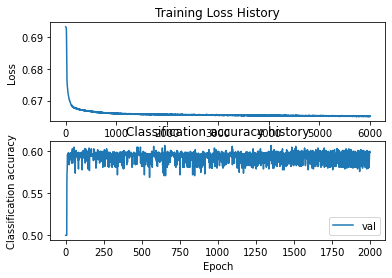

In [67]:
# test-case 1:
from MLP.evaluation import get_classification_accuracy
out_train = net_1.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ",acc)
out_val = net_1.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",acc)
test_acc = (net_1.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error_1)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy_1, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [70]:
# test-case 2:
input_size = 9
hidden_size = 5 # Hidden layer size (Hyper-parameter)
num_classes = 2 # Output

def init_model():
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net_2 = init_model()
net_2._modules[0].w = np.copy(net_1._modules[0].w)
net_2._modules[0].b = np.copy(net_1._modules[0].b)
net_2._modules[2].w = np.copy(net_1._modules[2].w)
net_2._modules[2].b = np.copy(net_1._modules[2].b)
optim = SGD(net_2, lr=0.00015, weight_decay=0.000)
loss_func = CrossEntropyLoss()
epoch = 6000
batch_size = 49000

#Initialize the trainer class by passing the above modules
trainer = Trainer(dataset, optim, net_2, loss_func, epoch, batch_size, validate_interval=3)

train_error_2, validation_accuracy_2 = trainer.train()

Epoch Average Loss: 0.664993286192622
Validate Acc: 0.598 Epoch: 0
Epoch Average Loss: 0.664983793674395
Epoch Average Loss: 0.664975214685710
Epoch Average Loss: 0.664967475986455
Validate Acc: 0.599 Epoch: 3
Epoch Average Loss: 0.664960505760273
Epoch Average Loss: 0.664954236278945
Epoch Average Loss: 0.664948581256678
Validate Acc: 0.600 Epoch: 6
Epoch Average Loss: 0.664943486575306
Epoch Average Loss: 0.664938879758509
Epoch Average Loss: 0.664934716289261
Validate Acc: 0.597 Epoch: 9
Epoch Average Loss: 0.664930975045371
Epoch Average Loss: 0.664927599891429
Epoch Average Loss: 0.664924536527714
Validate Acc: 0.598 Epoch: 12
Epoch Average Loss: 0.664921778431626
Epoch Average Loss: 0.664919288250842
Epoch Average Loss: 0.664917041699342
Validate Acc: 0.598 Epoch: 15
Epoch Average Loss: 0.664915014315340
Epoch Average Loss: 0.664913185621642
Epoch Average Loss: 0.664911538445020
Validate Acc: 0.597 Epoch: 18
Epoch Average Loss: 0.664910043896228
Epoch Average Loss: 0.664908699469

Epoch Average Loss: 0.664896337060208
Validate Acc: 0.595 Epoch: 174
Epoch Average Loss: 0.664896335752837
Epoch Average Loss: 0.664896334446935
Epoch Average Loss: 0.664896333142495
Validate Acc: 0.595 Epoch: 177
Epoch Average Loss: 0.664896331839511
Epoch Average Loss: 0.664896330537976
Epoch Average Loss: 0.664896329237886
Validate Acc: 0.595 Epoch: 180
Epoch Average Loss: 0.664896327939234
Epoch Average Loss: 0.664896326642015
Epoch Average Loss: 0.664896325346224
Validate Acc: 0.595 Epoch: 183
Epoch Average Loss: 0.664896324051854
Epoch Average Loss: 0.664896322758902
Epoch Average Loss: 0.664896321467361
Validate Acc: 0.595 Epoch: 186
Epoch Average Loss: 0.664896320177228
Epoch Average Loss: 0.664896318888497
Epoch Average Loss: 0.664896317601164
Validate Acc: 0.595 Epoch: 189
Epoch Average Loss: 0.664896316315223
Epoch Average Loss: 0.664896315030670
Epoch Average Loss: 0.664896313747502
Validate Acc: 0.595 Epoch: 192
Epoch Average Loss: 0.664896312465712
Epoch Average Loss: 0.6

Epoch Average Loss: 0.664896142742100
Validate Acc: 0.595 Epoch: 345
Epoch Average Loss: 0.664896141629374
Epoch Average Loss: 0.664896140517393
Epoch Average Loss: 0.664896139406155
Validate Acc: 0.595 Epoch: 348
Epoch Average Loss: 0.664896138295656
Epoch Average Loss: 0.664896137185895
Epoch Average Loss: 0.664896136076868
Validate Acc: 0.595 Epoch: 351
Epoch Average Loss: 0.664896134968573
Epoch Average Loss: 0.664896133861008
Epoch Average Loss: 0.664896132754171
Validate Acc: 0.595 Epoch: 354
Epoch Average Loss: 0.664896131670861
Epoch Average Loss: 0.664896130652698
Epoch Average Loss: 0.664896129635351
Validate Acc: 0.595 Epoch: 357
Epoch Average Loss: 0.664896128618798
Epoch Average Loss: 0.664896127603018
Epoch Average Loss: 0.664896126587993
Validate Acc: 0.595 Epoch: 360
Epoch Average Loss: 0.664896125573707
Epoch Average Loss: 0.664896124560144
Epoch Average Loss: 0.664896123547290
Validate Acc: 0.595 Epoch: 363
Epoch Average Loss: 0.664896122535133
Epoch Average Loss: 0.6

Epoch Average Loss: 0.664895991959968
Validate Acc: 0.595 Epoch: 516
Epoch Average Loss: 0.664895991169230
Epoch Average Loss: 0.664895990378816
Epoch Average Loss: 0.664895989588727
Validate Acc: 0.595 Epoch: 519
Epoch Average Loss: 0.664895988798961
Epoch Average Loss: 0.664895988009517
Epoch Average Loss: 0.664895987220396
Validate Acc: 0.595 Epoch: 522
Epoch Average Loss: 0.664895986431596
Epoch Average Loss: 0.664895985643117
Epoch Average Loss: 0.664895984854958
Validate Acc: 0.595 Epoch: 525
Epoch Average Loss: 0.664895984067118
Epoch Average Loss: 0.664895983279597
Epoch Average Loss: 0.664895982492393
Validate Acc: 0.595 Epoch: 528
Epoch Average Loss: 0.664895981705507
Epoch Average Loss: 0.664895980918937
Epoch Average Loss: 0.664895980132683
Validate Acc: 0.595 Epoch: 531
Epoch Average Loss: 0.664895979346744
Epoch Average Loss: 0.664895978561119
Epoch Average Loss: 0.664895977775809
Validate Acc: 0.595 Epoch: 534
Epoch Average Loss: 0.664895976990811
Epoch Average Loss: 0.6

Epoch Average Loss: 0.664895852705428
Epoch Average Loss: 0.664895851978632
Validate Acc: 0.595 Epoch: 687
Epoch Average Loss: 0.664895851252128
Epoch Average Loss: 0.664895850525906
Epoch Average Loss: 0.664895849799961
Validate Acc: 0.595 Epoch: 690
Epoch Average Loss: 0.664895849074285
Epoch Average Loss: 0.664895848348873
Epoch Average Loss: 0.664895847623719
Validate Acc: 0.595 Epoch: 693
Epoch Average Loss: 0.664895846898819
Epoch Average Loss: 0.664895846174168
Epoch Average Loss: 0.664895845449763
Validate Acc: 0.595 Epoch: 696
Epoch Average Loss: 0.664895844725598
Epoch Average Loss: 0.664895844001673
Epoch Average Loss: 0.664895843277982
Validate Acc: 0.595 Epoch: 699
Epoch Average Loss: 0.664895842554523
Epoch Average Loss: 0.664895841831295
Epoch Average Loss: 0.664895841108294
Validate Acc: 0.595 Epoch: 702
Epoch Average Loss: 0.664895840385518
Epoch Average Loss: 0.664895839657663
Epoch Average Loss: 0.664895838902804
Validate Acc: 0.595 Epoch: 705
Epoch Average Loss: 0.6

Validate Acc: 0.595 Epoch: 864
Epoch Average Loss: 0.664895715451235
Epoch Average Loss: 0.664895714731569
Epoch Average Loss: 0.664895714012072
Validate Acc: 0.595 Epoch: 867
Epoch Average Loss: 0.664895713292741
Epoch Average Loss: 0.664895712573578
Epoch Average Loss: 0.664895711854581
Validate Acc: 0.595 Epoch: 870
Epoch Average Loss: 0.664895711135750
Epoch Average Loss: 0.664895710417084
Epoch Average Loss: 0.664895709698583
Validate Acc: 0.595 Epoch: 873
Epoch Average Loss: 0.664895708980247
Epoch Average Loss: 0.664895708262074
Epoch Average Loss: 0.664895707544065
Validate Acc: 0.595 Epoch: 876
Epoch Average Loss: 0.664895706826219
Epoch Average Loss: 0.664895706108536
Epoch Average Loss: 0.664895705391015
Validate Acc: 0.595 Epoch: 879
Epoch Average Loss: 0.664895704673656
Epoch Average Loss: 0.664895703956458
Epoch Average Loss: 0.664895703239422
Validate Acc: 0.595 Epoch: 882
Epoch Average Loss: 0.664895702522545
Epoch Average Loss: 0.664895701805830
Epoch Average Loss: 0.6

Epoch Average Loss: 0.664895592774246
Validate Acc: 0.595 Epoch: 1044
Epoch Average Loss: 0.664895592128428
Epoch Average Loss: 0.664895591482798
Epoch Average Loss: 0.664895590837344
Validate Acc: 0.595 Epoch: 1047
Epoch Average Loss: 0.664895590192057
Epoch Average Loss: 0.664895589546929
Epoch Average Loss: 0.664895588901952
Validate Acc: 0.595 Epoch: 1050
Epoch Average Loss: 0.664895588257118
Epoch Average Loss: 0.664895587612421
Epoch Average Loss: 0.664895586967855
Validate Acc: 0.595 Epoch: 1053
Epoch Average Loss: 0.664895586323416
Epoch Average Loss: 0.664895585679098
Epoch Average Loss: 0.664895585034897
Validate Acc: 0.595 Epoch: 1056
Epoch Average Loss: 0.664895584390810
Epoch Average Loss: 0.664895583746832
Epoch Average Loss: 0.664895583102962
Validate Acc: 0.595 Epoch: 1059
Epoch Average Loss: 0.664895582459195
Epoch Average Loss: 0.664895581815529
Epoch Average Loss: 0.664895581171962
Validate Acc: 0.595 Epoch: 1062
Epoch Average Loss: 0.664895580528492
Epoch Average Lo

Validate Acc: 0.595 Epoch: 1215
Epoch Average Loss: 0.664895483038419
Epoch Average Loss: 0.664895482416262
Epoch Average Loss: 0.664895481794165
Validate Acc: 0.595 Epoch: 1218
Epoch Average Loss: 0.664895481172127
Epoch Average Loss: 0.664895480550149
Epoch Average Loss: 0.664895479928229
Validate Acc: 0.595 Epoch: 1221
Epoch Average Loss: 0.664895479309368
Epoch Average Loss: 0.664895478694141
Epoch Average Loss: 0.664895478079237
Validate Acc: 0.595 Epoch: 1224
Epoch Average Loss: 0.664895477465566
Epoch Average Loss: 0.664895476851324
Epoch Average Loss: 0.664895476237043
Validate Acc: 0.595 Epoch: 1227
Epoch Average Loss: 0.664895475623021
Epoch Average Loss: 0.664895475009242
Epoch Average Loss: 0.664895474395689
Validate Acc: 0.595 Epoch: 1230
Epoch Average Loss: 0.664895473782346
Epoch Average Loss: 0.664895473169201
Epoch Average Loss: 0.664895472556242
Validate Acc: 0.595 Epoch: 1233
Epoch Average Loss: 0.664895471943458
Epoch Average Loss: 0.664895471330840
Epoch Average Lo

Epoch Average Loss: 0.664895380356021
Epoch Average Loss: 0.664895379754411
Validate Acc: 0.595 Epoch: 1386
Epoch Average Loss: 0.664895379152860
Epoch Average Loss: 0.664895378551365
Epoch Average Loss: 0.664895377949928
Validate Acc: 0.595 Epoch: 1389
Epoch Average Loss: 0.664895377348548
Epoch Average Loss: 0.664895376747225
Epoch Average Loss: 0.664895376145959
Validate Acc: 0.595 Epoch: 1392
Epoch Average Loss: 0.664895375544750
Epoch Average Loss: 0.664895374943598
Epoch Average Loss: 0.664895374342502
Validate Acc: 0.595 Epoch: 1395
Epoch Average Loss: 0.664895373741462
Epoch Average Loss: 0.664895373140480
Epoch Average Loss: 0.664895372539553
Validate Acc: 0.595 Epoch: 1398
Epoch Average Loss: 0.664895371938682
Epoch Average Loss: 0.664895371337868
Epoch Average Loss: 0.664895370737109
Validate Acc: 0.595 Epoch: 1401
Epoch Average Loss: 0.664895370136407
Epoch Average Loss: 0.664895369535759
Epoch Average Loss: 0.664895368935168
Validate Acc: 0.595 Epoch: 1404
Epoch Average Lo

Epoch Average Loss: 0.664895275856012
Validate Acc: 0.595 Epoch: 1560
Epoch Average Loss: 0.664895275262886
Epoch Average Loss: 0.664895274669801
Epoch Average Loss: 0.664895274076757
Validate Acc: 0.595 Epoch: 1563
Epoch Average Loss: 0.664895273483752
Epoch Average Loss: 0.664895272890788
Epoch Average Loss: 0.664895272297864
Validate Acc: 0.595 Epoch: 1566
Epoch Average Loss: 0.664895271704980
Epoch Average Loss: 0.664895271112135
Epoch Average Loss: 0.664895270519331
Validate Acc: 0.595 Epoch: 1569
Epoch Average Loss: 0.664895269926567
Epoch Average Loss: 0.664895269333842
Epoch Average Loss: 0.664895268741157
Validate Acc: 0.595 Epoch: 1572
Epoch Average Loss: 0.664895268148512
Epoch Average Loss: 0.664895267555906
Epoch Average Loss: 0.664895266963340
Validate Acc: 0.595 Epoch: 1575
Epoch Average Loss: 0.664895266370813
Epoch Average Loss: 0.664895265778325
Epoch Average Loss: 0.664895265185876
Validate Acc: 0.595 Epoch: 1578
Epoch Average Loss: 0.664895264593467
Epoch Average Lo

Validate Acc: 0.595 Epoch: 1728
Epoch Average Loss: 0.664895176134824
Epoch Average Loss: 0.664895175547537
Epoch Average Loss: 0.664895174960280
Validate Acc: 0.595 Epoch: 1731
Epoch Average Loss: 0.664895174373053
Epoch Average Loss: 0.664895173785854
Epoch Average Loss: 0.664895173198685
Validate Acc: 0.595 Epoch: 1734
Epoch Average Loss: 0.664895172611545
Epoch Average Loss: 0.664895172024433
Epoch Average Loss: 0.664895171437351
Validate Acc: 0.595 Epoch: 1737
Epoch Average Loss: 0.664895170850297
Epoch Average Loss: 0.664895170263273
Epoch Average Loss: 0.664895169676277
Validate Acc: 0.595 Epoch: 1740
Epoch Average Loss: 0.664895169089310
Epoch Average Loss: 0.664895168502372
Epoch Average Loss: 0.664895167915462
Validate Acc: 0.595 Epoch: 1743
Epoch Average Loss: 0.664895167328581
Epoch Average Loss: 0.664895166741728
Epoch Average Loss: 0.664895166154904
Validate Acc: 0.595 Epoch: 1746
Epoch Average Loss: 0.664895165568109
Epoch Average Loss: 0.664895164981341
Epoch Average Lo

Epoch Average Loss: 0.664895071430813
Validate Acc: 0.595 Epoch: 1908
Epoch Average Loss: 0.664895070848008
Epoch Average Loss: 0.664895070265224
Epoch Average Loss: 0.664895069682461
Validate Acc: 0.595 Epoch: 1911
Epoch Average Loss: 0.664895069099720
Epoch Average Loss: 0.664895068517000
Epoch Average Loss: 0.664895067934301
Validate Acc: 0.595 Epoch: 1914
Epoch Average Loss: 0.664895067351623
Epoch Average Loss: 0.664895066768966
Epoch Average Loss: 0.664895066186330
Validate Acc: 0.595 Epoch: 1917
Epoch Average Loss: 0.664895065603715
Epoch Average Loss: 0.664895065021121
Epoch Average Loss: 0.664895064438548
Validate Acc: 0.595 Epoch: 1920
Epoch Average Loss: 0.664895063855996
Epoch Average Loss: 0.664895063273465
Epoch Average Loss: 0.664895062690954
Validate Acc: 0.595 Epoch: 1923
Epoch Average Loss: 0.664895062108464
Epoch Average Loss: 0.664895061525995
Epoch Average Loss: 0.664895060943547
Validate Acc: 0.595 Epoch: 1926
Epoch Average Loss: 0.664895060361119
Epoch Average Lo

Validate Acc: 0.595 Epoch: 2079
Epoch Average Loss: 0.664894971473265
Epoch Average Loss: 0.664894970893641
Epoch Average Loss: 0.664894970314034
Validate Acc: 0.595 Epoch: 2082
Epoch Average Loss: 0.664894969734442
Epoch Average Loss: 0.664894969154867
Epoch Average Loss: 0.664894968575307
Validate Acc: 0.595 Epoch: 2085
Epoch Average Loss: 0.664894967995764
Epoch Average Loss: 0.664894967416236
Epoch Average Loss: 0.664894966836724
Validate Acc: 0.595 Epoch: 2088
Epoch Average Loss: 0.664894966257228
Epoch Average Loss: 0.664894965677748
Epoch Average Loss: 0.664894965098284
Validate Acc: 0.595 Epoch: 2091
Epoch Average Loss: 0.664894964518835
Epoch Average Loss: 0.664894963939403
Epoch Average Loss: 0.664894963359986
Validate Acc: 0.595 Epoch: 2094
Epoch Average Loss: 0.664894962780584
Epoch Average Loss: 0.664894962201199
Epoch Average Loss: 0.664894961621829
Validate Acc: 0.595 Epoch: 2097
Epoch Average Loss: 0.664894961042474
Epoch Average Loss: 0.664894960463135
Epoch Average Lo

Epoch Average Loss: 0.664894872808060
Epoch Average Loss: 0.664894872233856
Epoch Average Loss: 0.664894871659671
Validate Acc: 0.595 Epoch: 2253
Epoch Average Loss: 0.664894871085504
Epoch Average Loss: 0.664894870511356
Epoch Average Loss: 0.664894869937225
Validate Acc: 0.595 Epoch: 2256
Epoch Average Loss: 0.664894869363114
Epoch Average Loss: 0.664894868789020
Epoch Average Loss: 0.664894868214945
Validate Acc: 0.595 Epoch: 2259
Epoch Average Loss: 0.664894867640888
Epoch Average Loss: 0.664894867066850
Epoch Average Loss: 0.664894866492829
Validate Acc: 0.595 Epoch: 2262
Epoch Average Loss: 0.664894865918826
Epoch Average Loss: 0.664894865344842
Epoch Average Loss: 0.664894864770875
Validate Acc: 0.595 Epoch: 2265
Epoch Average Loss: 0.664894864196927
Epoch Average Loss: 0.664894863622996
Epoch Average Loss: 0.664894863049083
Validate Acc: 0.595 Epoch: 2268
Epoch Average Loss: 0.664894862475188
Epoch Average Loss: 0.664894861901312
Epoch Average Loss: 0.664894861327452
Validate A

Epoch Average Loss: 0.664894776003605
Epoch Average Loss: 0.664894775432074
Validate Acc: 0.595 Epoch: 2421
Epoch Average Loss: 0.664894774860557
Epoch Average Loss: 0.664894774289053
Epoch Average Loss: 0.664894773717563
Validate Acc: 0.595 Epoch: 2424
Epoch Average Loss: 0.664894773146086
Epoch Average Loss: 0.664894772574623
Epoch Average Loss: 0.664894772003174
Validate Acc: 0.595 Epoch: 2427
Epoch Average Loss: 0.664894771431737
Epoch Average Loss: 0.664894770860315
Epoch Average Loss: 0.664894770288906
Validate Acc: 0.595 Epoch: 2430
Epoch Average Loss: 0.664894769717510
Epoch Average Loss: 0.664894769146127
Epoch Average Loss: 0.664894768574758
Validate Acc: 0.595 Epoch: 2433
Epoch Average Loss: 0.664894768003402
Epoch Average Loss: 0.664894767432060
Epoch Average Loss: 0.664894766860731
Validate Acc: 0.595 Epoch: 2436
Epoch Average Loss: 0.664894766289415
Epoch Average Loss: 0.664894765718112
Epoch Average Loss: 0.664894765146823
Validate Acc: 0.595 Epoch: 2439
Epoch Average Lo

Validate Acc: 0.595 Epoch: 2598
Epoch Average Loss: 0.664894673897700
Epoch Average Loss: 0.664894673328301
Epoch Average Loss: 0.664894672758913
Validate Acc: 0.595 Epoch: 2601
Epoch Average Loss: 0.664894672189535
Epoch Average Loss: 0.664894671620167
Epoch Average Loss: 0.664894671050810
Validate Acc: 0.595 Epoch: 2604
Epoch Average Loss: 0.664894670481464
Epoch Average Loss: 0.664894669912128
Epoch Average Loss: 0.664894669342802
Validate Acc: 0.595 Epoch: 2607
Epoch Average Loss: 0.664894668773486
Epoch Average Loss: 0.664894668204181
Epoch Average Loss: 0.664894667634886
Validate Acc: 0.595 Epoch: 2610
Epoch Average Loss: 0.664894667065602
Epoch Average Loss: 0.664894666496328
Epoch Average Loss: 0.664894665927064
Validate Acc: 0.595 Epoch: 2613
Epoch Average Loss: 0.664894665357810
Epoch Average Loss: 0.664894664788567
Epoch Average Loss: 0.664894664219334
Validate Acc: 0.595 Epoch: 2616
Epoch Average Loss: 0.664894663650111
Epoch Average Loss: 0.664894663080898
Epoch Average Lo

Epoch Average Loss: 0.664894572737929
Epoch Average Loss: 0.664894572172206
Validate Acc: 0.595 Epoch: 2778
Epoch Average Loss: 0.664894571606520
Epoch Average Loss: 0.664894571040867
Epoch Average Loss: 0.664894570475310
Validate Acc: 0.595 Epoch: 2781
Epoch Average Loss: 0.664894569910066
Epoch Average Loss: 0.664894569344463
Epoch Average Loss: 0.664894568778891
Validate Acc: 0.595 Epoch: 2784
Epoch Average Loss: 0.664894568213348
Epoch Average Loss: 0.664894567647833
Epoch Average Loss: 0.664894567082344
Validate Acc: 0.595 Epoch: 2787
Epoch Average Loss: 0.664894566516881
Epoch Average Loss: 0.664894565951442
Epoch Average Loss: 0.664894565386160
Validate Acc: 0.595 Epoch: 2790
Epoch Average Loss: 0.664894564820919
Epoch Average Loss: 0.664894564255515
Epoch Average Loss: 0.664894563690134
Validate Acc: 0.595 Epoch: 2793
Epoch Average Loss: 0.664894563124775
Epoch Average Loss: 0.664894562559438
Epoch Average Loss: 0.664894561994122
Validate Acc: 0.595 Epoch: 2796
Epoch Average Lo

Epoch Average Loss: 0.664894472278089
Validate Acc: 0.595 Epoch: 2955
Epoch Average Loss: 0.664894471714751
Epoch Average Loss: 0.664894471151423
Epoch Average Loss: 0.664894470588105
Validate Acc: 0.595 Epoch: 2958
Epoch Average Loss: 0.664894470024797
Epoch Average Loss: 0.664894469461500
Epoch Average Loss: 0.664894468898213
Validate Acc: 0.595 Epoch: 2961
Epoch Average Loss: 0.664894468334936
Epoch Average Loss: 0.664894467771669
Epoch Average Loss: 0.664894467208412
Validate Acc: 0.595 Epoch: 2964
Epoch Average Loss: 0.664894466645165
Epoch Average Loss: 0.664894466081929
Epoch Average Loss: 0.664894465518703
Validate Acc: 0.595 Epoch: 2967
Epoch Average Loss: 0.664894464955486
Epoch Average Loss: 0.664894464392280
Epoch Average Loss: 0.664894463829084
Validate Acc: 0.595 Epoch: 2970
Epoch Average Loss: 0.664894463265898
Epoch Average Loss: 0.664894462702722
Epoch Average Loss: 0.664894462139556
Validate Acc: 0.595 Epoch: 2973
Epoch Average Loss: 0.664894461576400
Epoch Average Lo

Epoch Average Loss: 0.664894375522261
Epoch Average Loss: 0.664894374960475
Epoch Average Loss: 0.664894374398697
Validate Acc: 0.595 Epoch: 3129
Epoch Average Loss: 0.664894373836927
Epoch Average Loss: 0.664894373275165
Epoch Average Loss: 0.664894372713411
Validate Acc: 0.595 Epoch: 3132
Epoch Average Loss: 0.664894372151665
Epoch Average Loss: 0.664894371589927
Epoch Average Loss: 0.664894371028197
Validate Acc: 0.595 Epoch: 3135
Epoch Average Loss: 0.664894370466474
Epoch Average Loss: 0.664894369904760
Epoch Average Loss: 0.664894369343053
Validate Acc: 0.595 Epoch: 3138
Epoch Average Loss: 0.664894368781355
Epoch Average Loss: 0.664894368219664
Epoch Average Loss: 0.664894367657981
Validate Acc: 0.595 Epoch: 3141
Epoch Average Loss: 0.664894367096306
Epoch Average Loss: 0.664894366535383
Epoch Average Loss: 0.664894365974530
Validate Acc: 0.595 Epoch: 3144
Epoch Average Loss: 0.664894365412877
Epoch Average Loss: 0.664894364851232
Epoch Average Loss: 0.664894364291152
Validate A

Epoch Average Loss: 0.664894280925079
Validate Acc: 0.595 Epoch: 3297
Epoch Average Loss: 0.664894280370922
Epoch Average Loss: 0.664894279816821
Epoch Average Loss: 0.664894279268040
Validate Acc: 0.595 Epoch: 3300
Epoch Average Loss: 0.664894278714539
Epoch Average Loss: 0.664894278160422
Epoch Average Loss: 0.664894277606363
Validate Acc: 0.595 Epoch: 3303
Epoch Average Loss: 0.664894277055008
Epoch Average Loss: 0.664894276504179
Epoch Average Loss: 0.664894275950105
Validate Acc: 0.595 Epoch: 3306
Epoch Average Loss: 0.664894275396090
Epoch Average Loss: 0.664894274842201
Epoch Average Loss: 0.664894274294002
Validate Acc: 0.595 Epoch: 3309
Epoch Average Loss: 0.664894273739973
Epoch Average Loss: 0.664894273186003
Epoch Average Loss: 0.664894272632089
Validate Acc: 0.595 Epoch: 3312
Epoch Average Loss: 0.664894272081426
Epoch Average Loss: 0.664894271530119
Epoch Average Loss: 0.664894270976189
Validate Acc: 0.595 Epoch: 3315
Epoch Average Loss: 0.664894270422316
Epoch Average Lo

Epoch Average Loss: 0.664894186764301
Validate Acc: 0.595 Epoch: 3468
Epoch Average Loss: 0.664894186207711
Epoch Average Loss: 0.664894185651137
Epoch Average Loss: 0.664894185095781
Validate Acc: 0.595 Epoch: 3471
Epoch Average Loss: 0.664894184542968
Epoch Average Loss: 0.664894183986361
Epoch Average Loss: 0.664894183429774
Validate Acc: 0.595 Epoch: 3474
Epoch Average Loss: 0.664894182873207
Epoch Average Loss: 0.664894182316942
Epoch Average Loss: 0.664894181765193
Validate Acc: 0.595 Epoch: 3477
Epoch Average Loss: 0.664894181208588
Epoch Average Loss: 0.664894180652007
Epoch Average Loss: 0.664894180095450
Validate Acc: 0.595 Epoch: 3480
Epoch Average Loss: 0.664894179538914
Epoch Average Loss: 0.664894178987410
Epoch Average Loss: 0.664894178431021
Validate Acc: 0.595 Epoch: 3483
Epoch Average Loss: 0.664894177874445
Epoch Average Loss: 0.664894177317896
Epoch Average Loss: 0.664894176761372
Validate Acc: 0.595 Epoch: 3486
Epoch Average Loss: 0.664894176209830
Epoch Average Lo

Epoch Average Loss: 0.664894090193116
Validate Acc: 0.595 Epoch: 3642
Epoch Average Loss: 0.664894089637592
Epoch Average Loss: 0.664894089082106
Epoch Average Loss: 0.664894088529652
Validate Acc: 0.595 Epoch: 3645
Epoch Average Loss: 0.664894087976449
Epoch Average Loss: 0.664894087420920
Epoch Average Loss: 0.664894086865433
Validate Acc: 0.595 Epoch: 3648
Epoch Average Loss: 0.664894086309983
Epoch Average Loss: 0.664894085757867
Epoch Average Loss: 0.664894085204385
Validate Acc: 0.595 Epoch: 3651
Epoch Average Loss: 0.664894084648893
Epoch Average Loss: 0.664894084093442
Epoch Average Loss: 0.664894083538029
Validate Acc: 0.595 Epoch: 3654
Epoch Average Loss: 0.664894082986177
Epoch Average Loss: 0.664894082432488
Epoch Average Loss: 0.664894081877033
Validate Acc: 0.595 Epoch: 3657
Epoch Average Loss: 0.664894081321618
Epoch Average Loss: 0.664894080766240
Epoch Average Loss: 0.664894080214586
Validate Acc: 0.595 Epoch: 3660
Epoch Average Loss: 0.664894079660758
Epoch Average Lo

Epoch Average Loss: 0.664893993339220
Validate Acc: 0.595 Epoch: 3816
Epoch Average Loss: 0.664893992781475
Epoch Average Loss: 0.664893992223773
Epoch Average Loss: 0.664893991667122
Validate Acc: 0.595 Epoch: 3819
Epoch Average Loss: 0.664893991113937
Epoch Average Loss: 0.664893990556192
Epoch Average Loss: 0.664893989998490
Validate Acc: 0.595 Epoch: 3822
Epoch Average Loss: 0.664893989440829
Epoch Average Loss: 0.664893988885701
Epoch Average Loss: 0.664893988331037
Validate Acc: 0.595 Epoch: 3825
Epoch Average Loss: 0.664893987773332
Epoch Average Loss: 0.664893987215670
Epoch Average Loss: 0.664893986658046
Validate Acc: 0.595 Epoch: 3828
Epoch Average Loss: 0.664893986104275
Epoch Average Loss: 0.664893985548299
Epoch Average Loss: 0.664893984990630
Validate Acc: 0.595 Epoch: 3831
Epoch Average Loss: 0.664893984433004
Epoch Average Loss: 0.664893983875415
Epoch Average Loss: 0.664893983322867
Validate Acc: 0.595 Epoch: 3834
Epoch Average Loss: 0.664893982765713
Epoch Average Lo

Epoch Average Loss: 0.664893897221292
Validate Acc: 0.595 Epoch: 3993
Epoch Average Loss: 0.664893896684887
Epoch Average Loss: 0.664893896148499
Epoch Average Loss: 0.664893895612128
Validate Acc: 0.595 Epoch: 3996
Epoch Average Loss: 0.664893895075774
Epoch Average Loss: 0.664893894539436
Epoch Average Loss: 0.664893894003116
Validate Acc: 0.595 Epoch: 3999
Epoch Average Loss: 0.664893893466812
Epoch Average Loss: 0.664893892930524
Epoch Average Loss: 0.664893892394253
Validate Acc: 0.595 Epoch: 4002
Epoch Average Loss: 0.664893891857999
Epoch Average Loss: 0.664893891321761
Epoch Average Loss: 0.664893890785539
Validate Acc: 0.595 Epoch: 4005
Epoch Average Loss: 0.664893890249334
Epoch Average Loss: 0.664893889713146
Epoch Average Loss: 0.664893889176973
Validate Acc: 0.595 Epoch: 4008
Epoch Average Loss: 0.664893888640817
Epoch Average Loss: 0.664893888104677
Epoch Average Loss: 0.664893887568554
Validate Acc: 0.595 Epoch: 4011
Epoch Average Loss: 0.664893887032446
Epoch Average Lo

Epoch Average Loss: 0.664893800312541
Validate Acc: 0.595 Epoch: 4173
Epoch Average Loss: 0.664893799762827
Epoch Average Loss: 0.664893799213127
Epoch Average Loss: 0.664893798663438
Validate Acc: 0.595 Epoch: 4176
Epoch Average Loss: 0.664893798113762
Epoch Average Loss: 0.664893797564097
Epoch Average Loss: 0.664893797014443
Validate Acc: 0.595 Epoch: 4179
Epoch Average Loss: 0.664893796464799
Epoch Average Loss: 0.664893795915165
Epoch Average Loss: 0.664893795365541
Validate Acc: 0.595 Epoch: 4182
Epoch Average Loss: 0.664893794815927
Epoch Average Loss: 0.664893794266321
Epoch Average Loss: 0.664893793716724
Validate Acc: 0.595 Epoch: 4185
Epoch Average Loss: 0.664893793167136
Epoch Average Loss: 0.664893792617556
Epoch Average Loss: 0.664893792067984
Validate Acc: 0.595 Epoch: 4188
Epoch Average Loss: 0.664893791518420
Epoch Average Loss: 0.664893790968864
Epoch Average Loss: 0.664893790419316
Validate Acc: 0.595 Epoch: 4191
Epoch Average Loss: 0.664893789869775
Epoch Average Lo

Epoch Average Loss: 0.664893708056556
Validate Acc: 0.595 Epoch: 4341
Epoch Average Loss: 0.664893707507894
Epoch Average Loss: 0.664893706959238
Epoch Average Loss: 0.664893706410586
Validate Acc: 0.595 Epoch: 4344
Epoch Average Loss: 0.664893705861940
Epoch Average Loss: 0.664893705313299
Epoch Average Loss: 0.664893704764663
Validate Acc: 0.595 Epoch: 4347
Epoch Average Loss: 0.664893704216033
Epoch Average Loss: 0.664893703667408
Epoch Average Loss: 0.664893703118787
Validate Acc: 0.595 Epoch: 4350
Epoch Average Loss: 0.664893702570173
Epoch Average Loss: 0.664893702021563
Epoch Average Loss: 0.664893701472958
Validate Acc: 0.595 Epoch: 4353
Epoch Average Loss: 0.664893700924359
Epoch Average Loss: 0.664893700375765
Epoch Average Loss: 0.664893699827176
Validate Acc: 0.595 Epoch: 4356
Epoch Average Loss: 0.664893699278592
Epoch Average Loss: 0.664893698730013
Epoch Average Loss: 0.664893698181440
Validate Acc: 0.595 Epoch: 4359
Epoch Average Loss: 0.664893697632871
Epoch Average Lo

Epoch Average Loss: 0.664893613233145
Epoch Average Loss: 0.664893612685262
Validate Acc: 0.595 Epoch: 4515
Epoch Average Loss: 0.664893612139871
Epoch Average Loss: 0.664893611592159
Epoch Average Loss: 0.664893611044235
Validate Acc: 0.595 Epoch: 4518
Epoch Average Loss: 0.664893610496325
Epoch Average Loss: 0.664893609948430
Epoch Average Loss: 0.664893609400546
Validate Acc: 0.595 Epoch: 4521
Epoch Average Loss: 0.664893608852675
Epoch Average Loss: 0.664893608304815
Epoch Average Loss: 0.664893607756965
Validate Acc: 0.595 Epoch: 4524
Epoch Average Loss: 0.664893607209520
Epoch Average Loss: 0.664893606663964
Epoch Average Loss: 0.664893606116072
Validate Acc: 0.595 Epoch: 4527
Epoch Average Loss: 0.664893605568195
Epoch Average Loss: 0.664893605020333
Epoch Average Loss: 0.664893604472484
Validate Acc: 0.595 Epoch: 4530
Epoch Average Loss: 0.664893603924647
Epoch Average Loss: 0.664893603376821
Epoch Average Loss: 0.664893602829007
Validate Acc: 0.595 Epoch: 4533
Epoch Average Lo

Epoch Average Loss: 0.664893521716708
Validate Acc: 0.595 Epoch: 4683
Epoch Average Loss: 0.664893521185368
Epoch Average Loss: 0.664893520654037
Epoch Average Loss: 0.664893520122717
Validate Acc: 0.595 Epoch: 4686
Epoch Average Loss: 0.664893519591406
Epoch Average Loss: 0.664893519060106
Epoch Average Loss: 0.664893518528815
Validate Acc: 0.595 Epoch: 4689
Epoch Average Loss: 0.664893517997534
Epoch Average Loss: 0.664893517466263
Epoch Average Loss: 0.664893516935002
Validate Acc: 0.595 Epoch: 4692
Epoch Average Loss: 0.664893516403750
Epoch Average Loss: 0.664893515872508
Epoch Average Loss: 0.664893515341276
Validate Acc: 0.595 Epoch: 4695
Epoch Average Loss: 0.664893514810053
Epoch Average Loss: 0.664893514278840
Epoch Average Loss: 0.664893513747637
Validate Acc: 0.595 Epoch: 4698
Epoch Average Loss: 0.664893513216443
Epoch Average Loss: 0.664893512685258
Epoch Average Loss: 0.664893512154083
Validate Acc: 0.595 Epoch: 4701
Epoch Average Loss: 0.664893511622917
Epoch Average Lo

Epoch Average Loss: 0.664893427804992
Validate Acc: 0.595 Epoch: 4860
Epoch Average Loss: 0.664893427275107
Epoch Average Loss: 0.664893426745230
Epoch Average Loss: 0.664893426215359
Validate Acc: 0.595 Epoch: 4863
Epoch Average Loss: 0.664893425685496
Epoch Average Loss: 0.664893425155639
Epoch Average Loss: 0.664893424625789
Validate Acc: 0.595 Epoch: 4866
Epoch Average Loss: 0.664893424095946
Epoch Average Loss: 0.664893423566110
Epoch Average Loss: 0.664893423036281
Validate Acc: 0.595 Epoch: 4869
Epoch Average Loss: 0.664893422506459
Epoch Average Loss: 0.664893421976644
Epoch Average Loss: 0.664893421446836
Validate Acc: 0.595 Epoch: 4872
Epoch Average Loss: 0.664893420917034
Epoch Average Loss: 0.664893420387239
Epoch Average Loss: 0.664893419857451
Validate Acc: 0.595 Epoch: 4875
Epoch Average Loss: 0.664893419327670
Epoch Average Loss: 0.664893418797896
Epoch Average Loss: 0.664893418268129
Validate Acc: 0.595 Epoch: 4878
Epoch Average Loss: 0.664893417738368
Epoch Average Lo

Epoch Average Loss: 0.664893337816949
Epoch Average Loss: 0.664893337288116
Validate Acc: 0.595 Epoch: 5031
Epoch Average Loss: 0.664893336759289
Epoch Average Loss: 0.664893336230467
Epoch Average Loss: 0.664893335701650
Validate Acc: 0.595 Epoch: 5034
Epoch Average Loss: 0.664893335172840
Epoch Average Loss: 0.664893334649301
Epoch Average Loss: 0.664893334122653
Validate Acc: 0.595 Epoch: 5037
Epoch Average Loss: 0.664893333597502
Epoch Average Loss: 0.664893333073070
Epoch Average Loss: 0.664893332546842
Validate Acc: 0.595 Epoch: 5040
Epoch Average Loss: 0.664893332022552
Epoch Average Loss: 0.664893331497805
Epoch Average Loss: 0.664893330971912
Validate Acc: 0.595 Epoch: 5043
Epoch Average Loss: 0.664893330447856
Epoch Average Loss: 0.664893329923302
Epoch Average Loss: 0.664893329397678
Validate Acc: 0.595 Epoch: 5046
Epoch Average Loss: 0.664893328873325
Epoch Average Loss: 0.664893328349406
Epoch Average Loss: 0.664893327824004
Validate Acc: 0.595 Epoch: 5049
Epoch Average Lo

Epoch Average Loss: 0.664893247769133
Validate Acc: 0.595 Epoch: 5202
Epoch Average Loss: 0.664893247246766
Epoch Average Loss: 0.664893246724414
Epoch Average Loss: 0.664893246202076
Validate Acc: 0.595 Epoch: 5205
Epoch Average Loss: 0.664893245679753
Epoch Average Loss: 0.664893245157444
Epoch Average Loss: 0.664893244635149
Validate Acc: 0.595 Epoch: 5208
Epoch Average Loss: 0.664893244113193
Epoch Average Loss: 0.664893243591390
Epoch Average Loss: 0.664893243069106
Validate Acc: 0.595 Epoch: 5211
Epoch Average Loss: 0.664893242546838
Epoch Average Loss: 0.664893242024585
Epoch Average Loss: 0.664893241502346
Validate Acc: 0.595 Epoch: 5214
Epoch Average Loss: 0.664893240980122
Epoch Average Loss: 0.664893240457911
Epoch Average Loss: 0.664893239935715
Validate Acc: 0.595 Epoch: 5217
Epoch Average Loss: 0.664893239413532
Epoch Average Loss: 0.664893238891362
Epoch Average Loss: 0.664893238369290
Validate Acc: 0.595 Epoch: 5220
Epoch Average Loss: 0.664893237847808
Epoch Average Lo

Epoch Average Loss: 0.664893158603092
Validate Acc: 0.595 Epoch: 5373
Epoch Average Loss: 0.664893158082437
Epoch Average Loss: 0.664893157561791
Epoch Average Loss: 0.664893157041154
Validate Acc: 0.595 Epoch: 5376
Epoch Average Loss: 0.664893156520524
Epoch Average Loss: 0.664893155999904
Epoch Average Loss: 0.664893155479292
Validate Acc: 0.595 Epoch: 5379
Epoch Average Loss: 0.664893154958688
Epoch Average Loss: 0.664893154438093
Epoch Average Loss: 0.664893153917506
Validate Acc: 0.595 Epoch: 5382
Epoch Average Loss: 0.664893153396928
Epoch Average Loss: 0.664893152876358
Epoch Average Loss: 0.664893152355796
Validate Acc: 0.595 Epoch: 5385
Epoch Average Loss: 0.664893151835243
Epoch Average Loss: 0.664893151314698
Epoch Average Loss: 0.664893150794162
Validate Acc: 0.595 Epoch: 5388
Epoch Average Loss: 0.664893150273633
Epoch Average Loss: 0.664893149753113
Epoch Average Loss: 0.664893149232602
Validate Acc: 0.595 Epoch: 5391
Epoch Average Loss: 0.664893148712098
Epoch Average Lo

Epoch Average Loss: 0.664893069704254
Validate Acc: 0.595 Epoch: 5544
Epoch Average Loss: 0.664893069187508
Epoch Average Loss: 0.664893068671777
Epoch Average Loss: 0.664893068155611
Validate Acc: 0.595 Epoch: 5547
Epoch Average Loss: 0.664893067639063
Epoch Average Loss: 0.664893067122616
Epoch Average Loss: 0.664893066606624
Validate Acc: 0.595 Epoch: 5550
Epoch Average Loss: 0.664893066091093
Epoch Average Loss: 0.664893065574793
Epoch Average Loss: 0.664893065058576
Validate Acc: 0.595 Epoch: 5553
Epoch Average Loss: 0.664893064542435
Epoch Average Loss: 0.664893064026552
Epoch Average Loss: 0.664893063511279
Validate Acc: 0.595 Epoch: 5556
Epoch Average Loss: 0.664893062995238
Epoch Average Loss: 0.664893062479262
Epoch Average Loss: 0.664893061963345
Validate Acc: 0.595 Epoch: 5559
Epoch Average Loss: 0.664893061447483
Epoch Average Loss: 0.664893060931672
Epoch Average Loss: 0.664893060416592
Validate Acc: 0.595 Epoch: 5562
Epoch Average Loss: 0.664893059900893
Epoch Average Lo

Epoch Average Loss: 0.664892980087979
Epoch Average Loss: 0.664892979563223
Validate Acc: 0.595 Epoch: 5718
Epoch Average Loss: 0.664892979039488
Epoch Average Loss: 0.664892978515558
Epoch Average Loss: 0.664892977990797
Validate Acc: 0.595 Epoch: 5721
Epoch Average Loss: 0.664892977467051
Epoch Average Loss: 0.664892976943168
Epoch Average Loss: 0.664892976418402
Validate Acc: 0.595 Epoch: 5724
Epoch Average Loss: 0.664892975894766
Epoch Average Loss: 0.664892975370804
Epoch Average Loss: 0.664892974846035
Validate Acc: 0.595 Epoch: 5727
Epoch Average Loss: 0.664892974322612
Epoch Average Loss: 0.664892973798464
Epoch Average Loss: 0.664892973273694
Validate Acc: 0.595 Epoch: 5730
Epoch Average Loss: 0.664892972750573
Epoch Average Loss: 0.664892972226149
Epoch Average Loss: 0.664892971701418
Validate Acc: 0.595 Epoch: 5733
Epoch Average Loss: 0.664892971178617
Epoch Average Loss: 0.664892970653831
Epoch Average Loss: 0.664892970129610
Validate Acc: 0.595 Epoch: 5736
Epoch Average Lo

Epoch Average Loss: 0.664892886812003
Validate Acc: 0.595 Epoch: 5889
Epoch Average Loss: 0.664892886281396
Epoch Average Loss: 0.664892885756407
Epoch Average Loss: 0.664892885233521
Validate Acc: 0.595 Epoch: 5892
Epoch Average Loss: 0.664892884710795
Epoch Average Loss: 0.664892884189307
Epoch Average Loss: 0.664892883666774
Validate Acc: 0.595 Epoch: 5895
Epoch Average Loss: 0.664892883144299
Epoch Average Loss: 0.664892882621876
Epoch Average Loss: 0.664892882100855
Validate Acc: 0.595 Epoch: 5898
Epoch Average Loss: 0.664892881578771
Epoch Average Loss: 0.664892881056548
Epoch Average Loss: 0.664892880535031
Validate Acc: 0.595 Epoch: 5901
Epoch Average Loss: 0.664892880013973
Epoch Average Loss: 0.664892879491879
Epoch Average Loss: 0.664892878970359
Validate Acc: 0.595 Epoch: 5904
Epoch Average Loss: 0.664892878449686
Epoch Average Loss: 0.664892877927674
Epoch Average Loss: 0.664892877406581
Validate Acc: 0.595 Epoch: 5907
Epoch Average Loss: 0.664892876885757
Epoch Average Lo

Training acc:  0.604326530612245
Validation acc:  0.595
Test accuracy:  0.6157697121401752


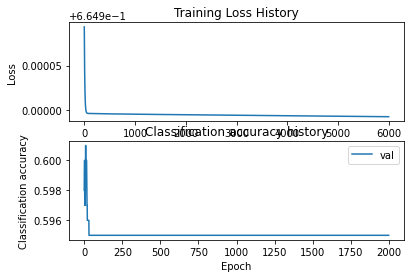

In [71]:
# test-case 2:
from MLP.evaluation import get_classification_accuracy
out_train = net_2.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ",acc)
out_val = net_2.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",acc)
test_acc = (net_2.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error_2)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy_2, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()